In [2]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score,\
v_measure_score, homogeneity_score, completeness_score
from sklearn import datasets
import csv

import numpy as np

%load_ext autoreload
%autoreload 2

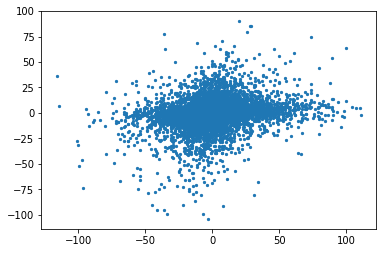

(11678, 64)
[[  26.    4.    5.    8.   -1.  -13. -109.  -66.   -9.    2.    4.   13.
   -18.  -30. -119.  -45.   17.    6.   -1.   -9.   27.   20.   91.   71.
   -26.   -1.    0.    1.   13.   20.  -62.  -19.   29.    2.    2.    0.
   -23.   -1.  -80.    4.   -7.   -6.  -12.  -27.  -11.  -16.  -67.   -8.
   -27.    1.    1.   13.   -8.  -11.   21.  -28.   61.    4.    8.    5.
     4.   -7.  -59.   16.]
 [ -47.   -6.   -5.   -7.   13.   -1.   35.  -10.   10.   -4.    0.    7.
   -31.  -33.  -48.  -52.   34.   10.    5.   -9.   23.   63.   76.   49.
   -27.   -7.   -7.   -3.    0.    4. -111.   -2.   -7.    7.   11.   11.
     2.    2.   76.    3.    7.   -2.    0.   -6.   21.   -3.    0.   -8.
   -40.   -4.   -1.    6.   -2.   -2. -105.  -25.   47.    6.    6.    5.
    13.   21.  111.   15.]
 [ -19.   -8.   -8.   -8.  -21.   -6.  -79.   12.    0.    5.    4.   16.
    24.    9.   33.   34.   -1.   -4.   -3.   -6.   -7.  -11.  -85.  -12.
   -10.   -2.   -3.   -2.   -8.  -30.  -16.  -

In [3]:
with open('../data/hand_gestures_classification/hand_gestures_classification_merged.csv', 'r') as f:
    reader = csv.reader(f)
    hand_gestures_dataset = list(reader)
    
hand_gestures_dataset_labels = np.array([int(sublist[-1]) for sublist in hand_gestures_dataset])
hand_gestures_dataset = [[float(numStr) if numStr else 0 for numStr in sublist[:-1]] for sublist in hand_gestures_dataset]
hand_gestures_dataset = np.array(hand_gestures_dataset)

ClusterUtils.visualize_sample_data(hand_gestures_dataset)
X = hand_gestures_dataset
y_true = hand_gestures_dataset_labels
print(hand_gestures_dataset.shape)
print(hand_gestures_dataset[:5])

### Test with Parallel Runs : Using silhouette_score as Evaluator

In [4]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 30], Default: 5
    n_components___TSNE, Type: Ordinal, Sequence: {2, 3}, Default: 2
    perplexity___TSNE, Type: UniformFloat, Range: [1.0, 300.0], Default: 30.0
    random_state___GaussianMixture, Type: UniformInteger, Range: [0, 9], Default: 0
    random_state___TSNE, Type: Ordinal, Sequence: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, Default: 0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, De

In [5]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'full'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 12.0
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 5
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 30.0
  random_state___GaussianMixture, Value: 0
  random_state___TSNE, Value: 0
  warm_start___GaussianMixture, Value: False

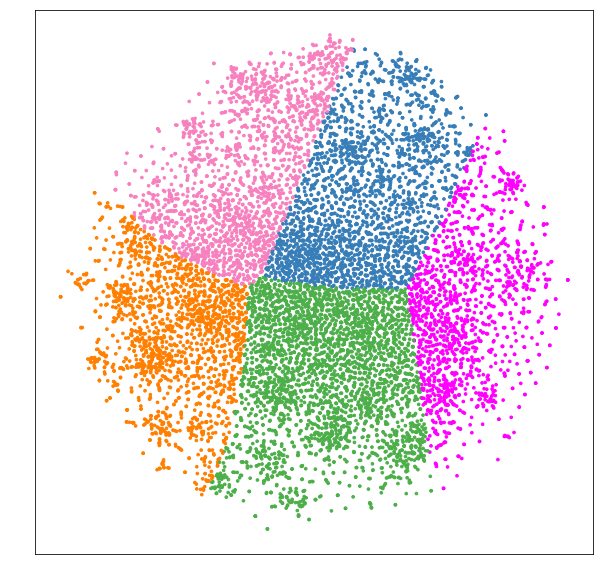

array([0, 1, 2, 3, 4])

In [6]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [7]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
   random_state___GaussianMixture, Value: 0
   random_state___TSNE, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0002968311309814453),
 TrajEntry(train_perf=2147483647.0, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perpl

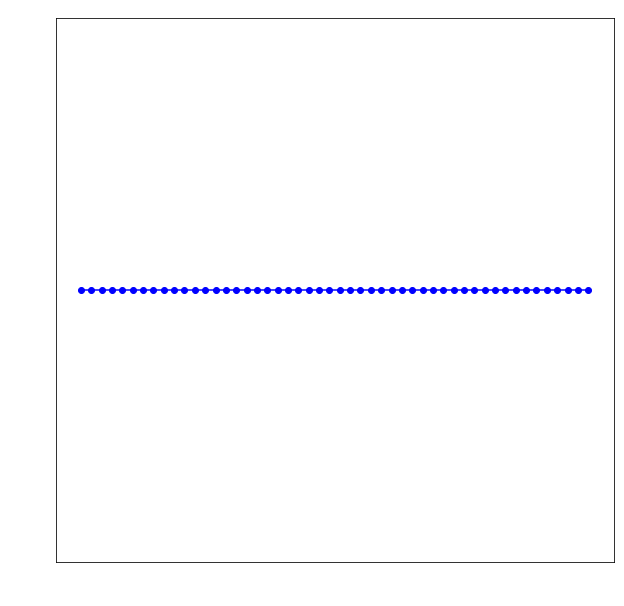

In [8]:
autocluster.plot_convergence()

In [9]:
print(predictions[:100])

[0 0 4 0 0 4 4 4 4 3 4 4 4 0 4 0 0 0 0 4 4 0 3 2 0 0 0 4 4 4 4 0 0 4 0 4 4
 0 0 4 3 0 4 4 4 0 0 4 0 0 4 2 0 4 4 0 4 4 0 4 0 2 0 0 2 0 2 4 0 4 0 4 0 4
 3 2 4 0 0 0 0 0 4 0 4 0 0 0 4 0 0 2 4 4 0 4 2 0 2 0]


In [10]:
print(y_true[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


- v_measure = (1 + beta) * homogeneity * completeness
                / (beta * homogeneity + completeness)
  when beta = 1(default), v_measure = the harmonic mean

In [11]:
print(v_measure_score(labels_true=y_true, labels_pred=predictions))
print(homogeneity_score(labels_true=y_true, labels_pred=predictions))
print(completeness_score(labels_true=y_true, labels_pred=predictions))

0.10215075456991014
0.10899535880942465
0.09611500085076032


###   

### Test with Parallel Runs : Using v_measure_score as Evaluator(only for test)

In [12]:
autocluster_test = AutoCluster()
smac_obj_test, opt_result_test = autocluster_test.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                #else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                               else -1 * v_measure_score(labels_true=y_true, \
                                                                    labels_pred=y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 30], Default: 5
    n_components___TSNE, Type: Ordinal, Sequence: {2, 3}, Default: 2
    perplexity___TSNE, Type: UniformFloat, Range: [1.0, 300.0], Default: 30.0
    random_state___GaussianMixture, Type: UniformInteger, Range: [0, 9], Default: 0
    random_state___TSNE, Type: Ordinal, Sequence: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, Default: 0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, De

In [13]:
opt_result_test

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'full'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 12.0
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 5
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 30.0
  random_state___GaussianMixture, Value: 0
  random_state___TSNE, Value: 0
  warm_start___GaussianMixture, Value: False

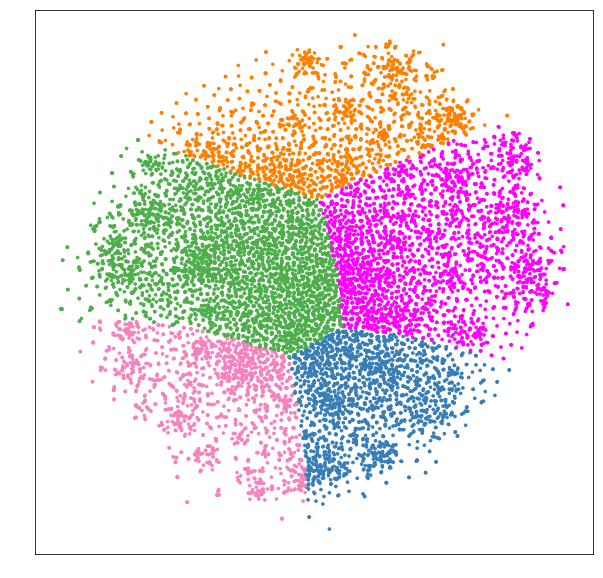

array([0, 1, 2, 3, 4])

In [18]:
predictions_test = autocluster_test.predict(X)
np.unique(predictions_test)

In [15]:
smac_obj_test.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
   random_state___GaussianMixture, Value: 0
   random_state___TSNE, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0003371238708496094),
 TrajEntry(train_perf=2147483647.0, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perpl

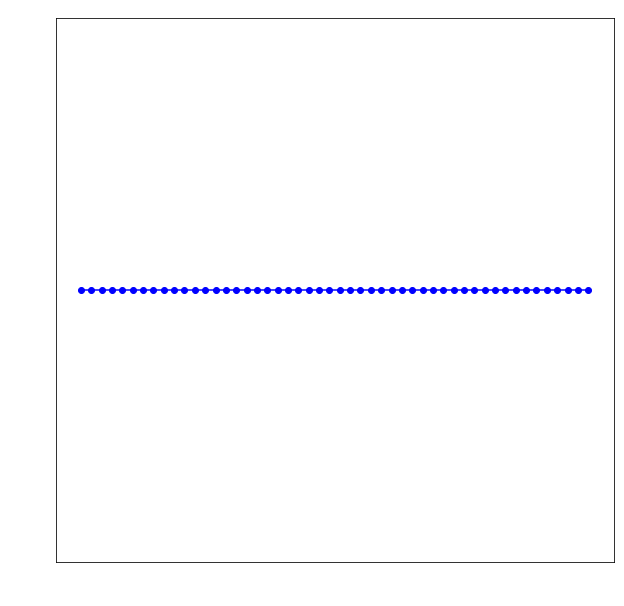

In [23]:
autocluster_test.plot_convergence()

In [20]:
print(predictions_test[:100])

[1 1 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 3 1 3 3 1 1 2 3 3 1 3 3 3 3 3 1 3 1 3 3
 1 1 3 1 3 3 3 1 1 3 3 1 3 3 2 3 3 3 3 3 3 1 3 3 2 3 1 2 2 4 3 1 3 1 0 3 3
 1 2 3 2 3 3 1 3 3 3 3 1 1 1 3 3 3 2 3 3 1 3 2 1 2 3]


In [21]:
print(y_true[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
print(v_measure_score(labels_true=y_true, labels_pred=predictions_test))
print(homogeneity_score(labels_true=y_true, labels_pred=predictions_test))
print(completeness_score(labels_true=y_true, labels_pred=predictions_test))

0.13150045192432122
0.13875038941418294
0.12497053465251627
